<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height:300px">
    <div style="margin: 5px; padding: 10px;">
    <h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h4 style="color:rgba(0,0,0,0.6)">Sebastian Anger, Taufiqurrahman, Tobias Megies, Alice Gabriel
    </div>
    <div style="float:right; margin: 20px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 100px">
        <div style="position:relative; top:40%; transform: translateY(-50%)">
        <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%"> De-/Convolution</div>
        </div>
    </div>
</div>

**Please, do not forget to execute the Cell 1 first!**

In [1]:
# Cell 1: Preparation for programming
%pylab inline
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 3

Populating the interactive namespace from numpy and matplotlib


### Exercise 1: Convolution with a boxcar function

This exercise is dedicated to understand the principle of convolution. Here, we will convolve a signal with a boxcar function in two different ways and compare the results.

a) Try to understand the code in Cell 2 and 3. Execute the cells.

b) Try to understand the code in Cell 4a and 4b. Execute the cells. What to do you observe concerning the time needed for calculation? What do you observe concerning the number of samples of the original and convolved functions? Try to explain your observations, use a markdown cell to write down your observations.

c) Use Cells 5a and 5b to perform the convolution of the cosine with the boxcar. Compare the results of the two convolved signals and try to explain your observation. Hint: Remember what you learned last lesson. Again, use a markdown cell to write down your observations.

In [2]:
# Cell 2: Defining a function for discrete convolution
# mainly i.e.: flip, shift, multiply and sum
def conv(x, y):
    """Calculates the discrete convolution of two signals x and y.
    
    In
    ----------
    x : first signal, the "measurement" (array of floats)
    y : second signal, the convolution function, sometimes called kernel (array of float)

    Out
    -------
    c : convolution (array of floats)
    """
    m = len(x)
    n = len(y)
    c = np.zeros(m+n-1)              # initally, setting all convolution values to zero
    
    for i in range(0, m):
        for j in range(0, n):
            c[i] += x[i-j] * y[j]
            
    return c

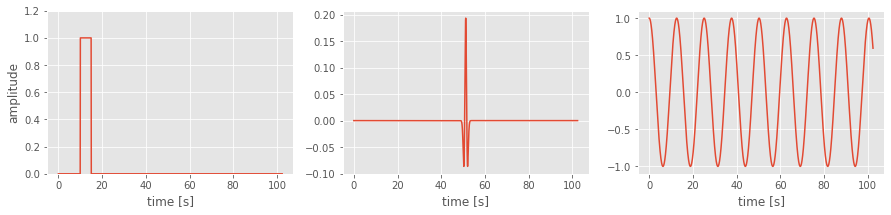

In [3]:
# Cell 3: Defining the boxcar + two different functions

npts = 4096                             # number of samples, initial value: 4096
dt = 0.025                                # sample rate, initial value:0.025 
# What is the maximum frequency of the data?   

t = np.linspace(0,npts*dt,npts)

# boxcar
box = np.zeros(npts)
for i in range(400,600):
    box[i] = 1.

# Ricker wavelet
rk = signal.ricker(npts, 20.0)         # 2nd number = width of wavelet, intial value: 20.0 

# cosine 
cosine = np.cos(t/2)
    
# plot all functions
rcParams["figure.figsize"] = (15, 3)

plt.subplot(131)
plt.plot(t, box)
plt.ylim(0,1.2)
#plt.xlim(0,100)
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(132)
plt.plot(t, rk)
#plt.xlim(0,100)
plt.xlabel('time [s]')

plt.subplot(133)
plt.plot(t, cosine)
plt.xlabel('time [s]')

plt.show()


In [4]:
# Cell 4a: Determine the convolution of the Ricker wavelet with the boxcar

# measures time since 01.01.1970 in seconds
tick1 = time() 
# calculate convolution with function of Cell 2
c1 = conv(rk, box)
tick2 = time()                     

# calculate convolution with numpy function
tick3 = time()
c2 = np.convolve(rk, box)
tick4 = time()

#taking first time difference and give it in seconds
delta=tick2 - tick1
hours=int( delta/3600. )
minit=int((delta-hours*3600.)/60. )
secon=int( delta-hours*3600.-minit*60. )
print("1st run:", secon, "s needed for calculation")
#taking secondt time difference and give it in seconds
delta=tick4 - tick3
hours=int( delta/3600. )
minit=int((delta-hours*3600.)/60. )
secon=int( delta-hours*3600.-minit*60. )
print("2nd run:", secon, "s needed for calculation")


1st run: 36 s needed for calculation
2nd run: 0 s needed for calculation


number of samples of new signal: 8191


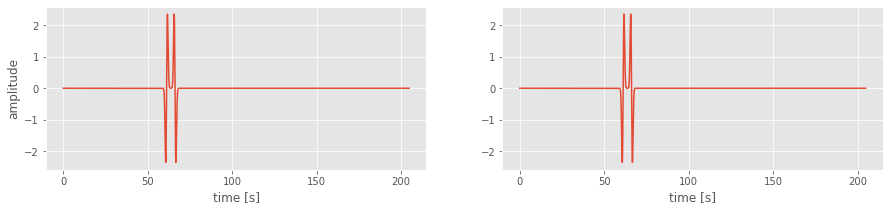

In [5]:
# Cell 4b: plot convolutions

# preparation for plotting
print('number of samples of new signal:', len(c1))
npts2 = len(c1)
t2 = np.linspace(0,npts2*dt,npts2)

# plotting
plt.subplot(121)
plt.plot(t2, c1)
#plt.xlim(0,130)
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(122)
plt.plot(t2, c2)
#plt.xlim(0,130)
plt.xlabel('time [s]')

plt.show()

In [6]:
# Cell 5a: Determine the convolution of cosine with the boxcar



In [7]:
# Cell 5b: plot convolutions



<br />
<br />
<br />

### Exercise 2: Convolution of noisy data

This exercise will show you what can happen when you convolve/filter noisy data and do not take care for the noise.
Be aware of the trade off between stabilizing the deconvolution and degrading accuracy of deconvolution!

a) Try to understand the code in Cell 6 and 7, and execute them. Compare the convolved signals in time and frequency domain. Describe what you see and the reason for it in a markdown cell.

b) Try to understand the code of Cell 8 and execute it. Describe and explain the outcome in a markdown cell.

c) Play around with the water-level applied during deconvolution (line 7 in Cell 8): change it in steps to higher values. What happens? Try to explain.

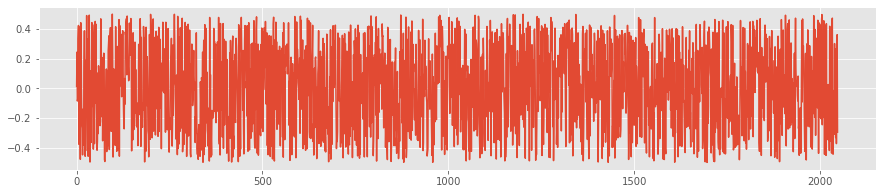

<ipython-input-8-a2ce07430614>:66: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,3)
<ipython-input-8-a2ce07430614>:73: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,3)
<ipython-input-8-a2ce07430614>:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,5)


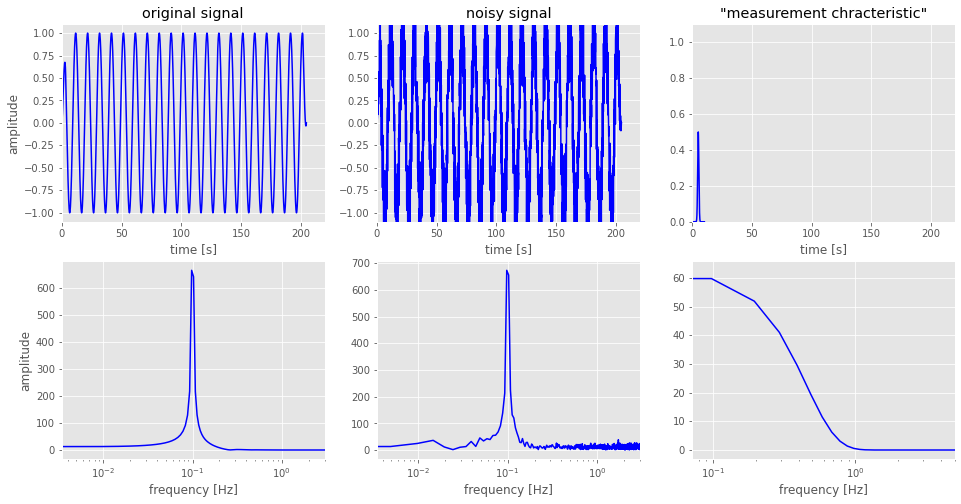

In [8]:
# Cell 6: setting up a noisy signal to be convolved with the "characteristics of a measurement device"

# creating original signal
npts = 2048                             # number of samples, initial value: 2048
dt = 0.1                                # sample rate, initial value:0.1 
t = np.linspace(0, npts*dt, npts)
a_ = np.sin(2*np.pi*dt * t + np.pi/5)

# creating noisy signal
#an_ = a_  * np.random.rand(a_.size) 
noiselevel = 0.5
an_ = a_  + noiselevel*((np.random.rand(a_.size)-.5)*2) 

plt.plot(an_ - a_)
plt.show()

# need to taper the signal first 
taper_percentage = 0.03  
# choose the type of taper window
taper = np.bartlett(int(npts * taper_percentage))
# fill taper with ones in the middle to fit length of data
taper_left, taper_right = np.array_split(taper, 2)
taper = np.concatenate([taper_left, np.ones(npts-len(taper)), taper_right])


# Taper signals
a = a_ * taper
an = an_ * taper

# creating gauss function as "characterisitc of measurement devise"
npts2 = 1024
dt2=0.01
gauss = 0.5 * signal.gaussian(npts2, std=50)
tg = np.linspace(0, npts2*dt2, npts2)


# plot everything
rcParams["figure.figsize"] = (16, 8)

plt.subplot(231)
plt.plot(t, a, 'b')
plt.title('original signal')
plt.xlim(0, 220)
plt.ylim(-1.1, 1.1)
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(232)
plt.plot(t, an, 'b')
plt.xlim(0, 220)
plt.ylim(-1.1, 1.1)
plt.title('noisy signal')
plt.xlabel('time [s]')

plt.subplot(233)
plt.plot(tg, gauss, 'b')
plt.xlim(0, 220)
plt.ylim(0, 1.1)
plt.title('"measurement chracteristic"')
plt.xlabel('time [s]')

plt.subplot(234)
A = np.fft.rfft(a)
f = np.linspace(0, (1/dt)/2, len(A))
plt.semilogx(f, abs(A), 'b')
plt.xlim(0,3)
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')

plt.subplot(235)
AN = np.fft.rfft(an)
plt.semilogx(f, abs(AN), 'b')
plt.xlim(0,3)
plt.xlabel('frequency [Hz]')

plt.subplot(236)
GAUSS = np.fft.rfft(gauss)
fg = np.linspace(0, (1/dt2)/2, len(GAUSS))
plt.semilogx(fg, abs(GAUSS), 'b')
plt.xlim(0,5)
plt.xlabel('frequency [Hz]')

plt.show()


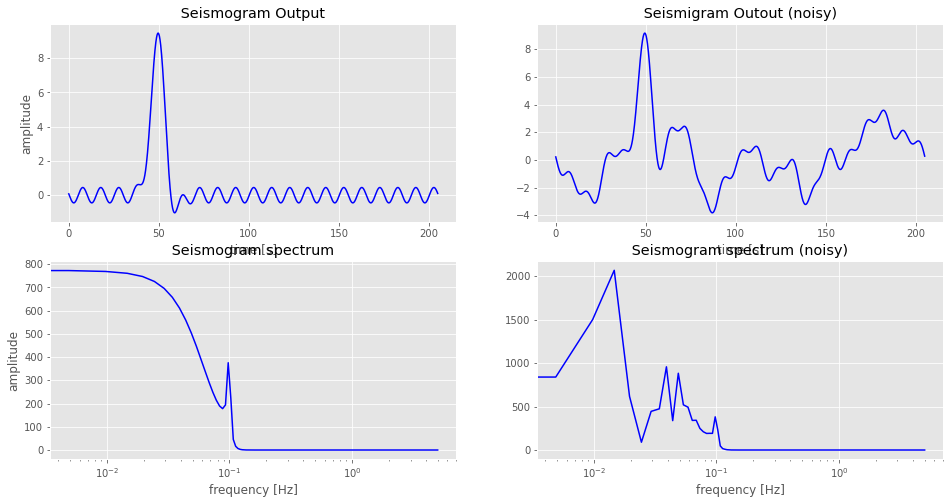

In [9]:
# Cell 7: convolve both signals with "characteristic"
# remember: convolution in the time domain is multiplication in the frequency domain 

# zero padding to ensure that G has the same length than the functions
padding_factor = npts /npts2        
G = np.fft.rfft(gauss, n=int(len(gauss)*padding_factor))

# convolve pure signal
A = np.fft.rfft(a)
Aconv = np.fft.irfft(G * A)

# convolve noisy signal
AN = np.fft.rfft(an)
ANconv = np.fft.irfft(G * AN)

# plot everything
tc = np.linspace(0, len(ANconv)*dt, len(ANconv))
rcParams["figure.figsize"] = (16, 8)

plt.subplot(221)
plt.plot(tc, Aconv, 'b')
plt.xlabel('time [s]')
plt.title(' Seismogram Output ')
plt.ylabel('amplitude')

plt.subplot(222)
plt.plot(tc, ANconv, 'b')
plt.title(' Seismigram Outout (noisy) ')
plt.xlabel('time [s]')

plt.subplot(223)
AC = np.fft.rfft(Aconv)
fac = np.linspace(0, (1/dt)/2, len(AC))
plt.semilogx(fac, abs(AC), 'b')
plt.title(' Seismogram spectrum ')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')

plt.subplot(224)
ANC = np.fft.rfft(ANconv)
plt.semilogx(fac, abs(ANC), 'b')
plt.title(' Seismogram spectrum (noisy) ')
plt.xlabel('frequency [Hz]')

plt.show()


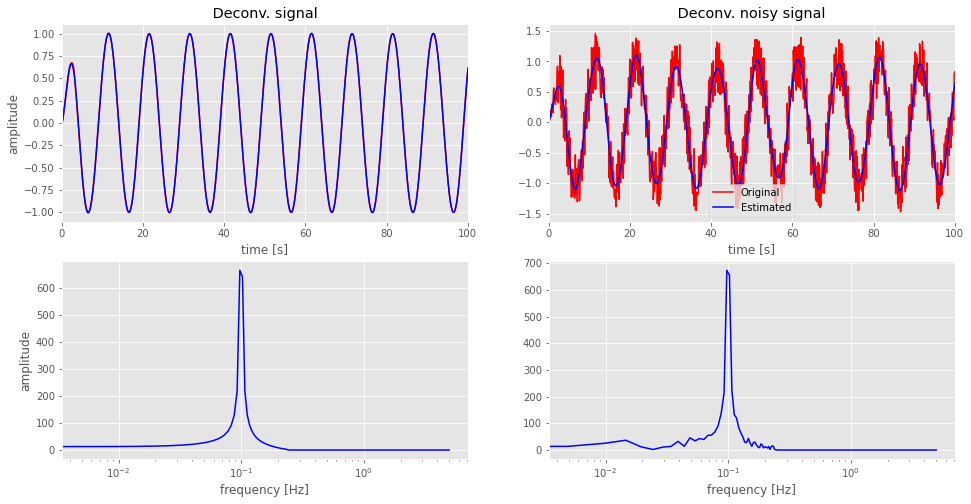

In [10]:
# Cell 8: deconvolution and comparison with original function 

# to not always overwrite G, we copy it and work with the copy
G_ = G.copy()

# because division by zero is not defined, we need to provide a water leverl aleady now
wl = 1e-10             # initial value 1e-20
for i in range(0, len(G_)):
    if G_[i] < wl:
        G_[i] += wl
        
# deconvolve pure signal
Adeconv = np.fft.irfft(AC/ G_)

# deconvolve noisy signal
ANdeconv = np.fft.irfft(ANC/ G_)

# plot everything
tdc = np.linspace(0, len(Adeconv)*dt, len(Adeconv))
rcParams["figure.figsize"] = (16, 8)

plt.subplot(221)
plt.plot(tdc, a, 'r')
plt.plot(tdc, Adeconv, 'b')
plt.xlim(0, 100)
plt.title(' Deconv. signal ')
plt.xlabel('time [s]')
plt.ylabel('amplitude')

plt.subplot(222)
plt.plot(tdc, an, 'r')
plt.plot(tdc, ANdeconv, 'b')
plt.title(' Deconv. noisy signal ')
plt.legend(['Original' , 'Estimated'])
plt.xlim(0, 100)
plt.xlabel('time [s]')

plt.subplot(223)
AD = np.fft.rfft(Adeconv)
fac = np.linspace(0, (1/dt)/2, len(AC))
plt.semilogx(fac, abs(AD), 'b')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')

plt.subplot(224)
AND = np.fft.rfft(ANdeconv)
plt.semilogx(fac, abs(AND), 'b')
plt.xlabel('frequency [Hz]')

plt.show()
